In [319]:
!echo $SHELL
!echo $PATH
!echo $JOURNAL_ROOT

%load_ext autoreload
%autoreload 2
import logging
logging.basicConfig(level=logging.ERROR)
import random
random.seed(0)
import os

import dotenv

dotenv.load_dotenv()

import pprint
from pprint import pp 
pprint.pp(dict(os.environ))

os.getenv('JOURNAL_ROOT')

import seaborn as sns

import src.journal as jr

from src.analysis import *
import analysis

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

!rm -rf output
logger = logging.getLogger()


logger.setLevel(logging.ERROR)
logging.getLogger().setLevel(logging.WARNING)

def mode_debug():
    logging.getLogger().setLevel(logging.DEBUG)
def mode_info():
    logging.getLogger().setLevel(logging.INFO)
def mode_warn():
    logging.getLogger().setLevel(logging.WARN)
def mode_err():
    logging.getLogger().setLevel(logging.ERROR)



/bin/zsh
/Users/tobiaspucher/miniconda3/bin:/opt/homebrew/opt/node@22/bin:/Users/tobiaspucher/miniconda3/condabin:/opt/homebrew/bin:/opt/homebrew/sbin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/local/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/appleinternal/bin:/Library/Apple/usr/bin:/Library/TeX/texbin:/Users/tobiaspucher/.cargo/bin:/Users/tobiaspucher/.local/bin:/Users/tobiaspucher/Library/Application Support/JetBrains/Toolbox/scripts:/Users/tobiaspucher/.lmstudio/bin
/Users/tobiaspucher/Library/CloudStorage/OneDrive-Personal/2025/trade_journal
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
{'COMMAND_MODE': 'unix2003',
 'CONDA_EXE': '/Users/tobiaspucher/miniconda3/bin/conda',
 'CONDA_PYTHON_EXE': '/Users/tobiaspucher/miniconda3/bin/python',
 'CONDA_SHLVL': '1

In [320]:

# src/journal.py
"""
This file is used to define some rudimentray functions for test data and also the actual journal with real data.

The main goal is to use the features.py file to define features step by step for each trade and then do little to no changes afterwards, besides maybe adding 
new features afterwards. The trades are then stored in a journal, which is simply a list of trades.
The journal supports going over all the trades and creating a feature dataframe for further analysis.

"""

from datetime import datetime, timedelta
import markdown
import os
import random
import logging
import re  # Add regex module for pattern matching
import scipy
from src.tradecli import * 
from src.features import *
from src.generate_test_data import get_test_data_journal
import trade

logging.basicConfig(level=logging.INFO)

# TRADING ACCOUNTS
ACC_IDEAL = "ideal"
ACC_MT5_VANTAGE = "mt5_vantage"
ACC_TEST = "test_account"

# TIMEFRAMES

J = TradeJournal()

t01 = DataPoint('01')
t = trade.Trade(entry_price=85490.33,
                size=0.5,
                entry_time="2025-04-15 13:11:29",
                side="long",
                sl_price=85379.48,
                tp_price=90068.42,
                sl_monetary_value=-48.70)

t.add_position(entry_price=85557.41,
                    size=0.5,
                    entry_time="2025-04-15 13:25.18")


t.close_position(exit_price=85578, exit_time="2025-04-15 14:39")
t01.add_dict(t.to_trade_row())
J.add_trade(t01)

df = J.to_dataframe() 

display(df.tail(4))

display(df.describe())

print(df.columns)
print(df.dtypes)

# report Nans for each column
print('Nans:')
print(df.isna().sum())

# report Nans for each column as percentage
print('Nans as percentage:')
print(df.isna().sum() / df.shape[0])

KeyError: 'sl_price'

In [321]:
from analysis import *
import analysis
import journal
import strategy
import features as f

mode_warn()

df = jr.j.to_dataframe().copy()
#display(df.tail())


def prepare_data(df:pd.DataFrame):
    df = df.rename(columns={'return': 'return_points'})
    df = df[(df['account'] != journal.ACC_TEST) & (True)]
    
    return df

df = prepare_data(df)
 
type_X_cols = f.PA.used_tags_in_df_not_null(df)
#print(type_X_cols)

fixed_columns = ['trade_uid', 'entry_time', ]  # Columns to fixate at the beginning
class_order = [f.Outcome, f.Account, f.POI]  # Define the order of classes

df = f.reorder_dataframe_columns(df, fixed_columns, class_order)
display(df)


TECHNICAL_TAGS = fixed_columns + ['outcome', 'taken', 'entry_price', 'tp_price', 'sl_price', 'SL_distance', 'TP_distance', 'close_price',  'rr',
                                   'return_points', 'potential_price', 'potential_risk_reward', 'poi', 'numerical_confidence']

minidf = df[TECHNICAL_TAGS]

minidf

AttributeError: module 'journal' has no attribute 'AC'

In [293]:
mode_warn()

def sanity_check_all(**kwargs):
    f.RiskManagement.sanity_check(df, **kwargs)
    f.Outcome.sanity_check(df, **kwargs)
    f.POI.sanity_check(df, **kwargs)
    f.Account.sanity_check(df, **kwargs)
    strategy.StrategyV1().sanity_check(df, **kwargs)
    
sanity_check_all()

 OK - RiskManagement sanity check: (pass) 
 OK - Outcome sanity check: (pass) 
 OK - POI sanity check:  
 FAILED - Account sanity check: valid_ratio=0.67 to low (to many nans) 
 OK: StrategyV1 


In [294]:
f.POI.summary(df)

Summary of POIs:
Used POIs: poi_1m_sc, poi_1h_liquidity_grab, poi_15m_liquidity_grab, poi_1h_sc, poi_15m_sc, poi_1h_mitigation, poi_1m_liquidity_grab, poi_15m_mitigation, poi_1m_mitigation
Not Used POIs: No, i.e All POIs are used


In [295]:

display(df['entry_time'])

calculate_performance_metrics(df)

0   2025-02-18 14:10:00
1   2025-02-22 15:11:00
2                   NaT
Name: entry_time, dtype: datetime64[ns]

Total Trades                  3.000000
Total Return                -59.130000
Average Return              -59.130000
Max Return Drawdown           0.000000
Total Risk Reward Ratio       4.025187
Average Risk Reward Ratio     4.025187
Max Risk Reward Ratio         4.025187
Min Risk Reward Ratio         4.025187
Win Rate (%)                  0.333333
Average Win RR                4.025187
Max Win RR                    4.025187
Min Win RR                    4.025187
dtype: float64

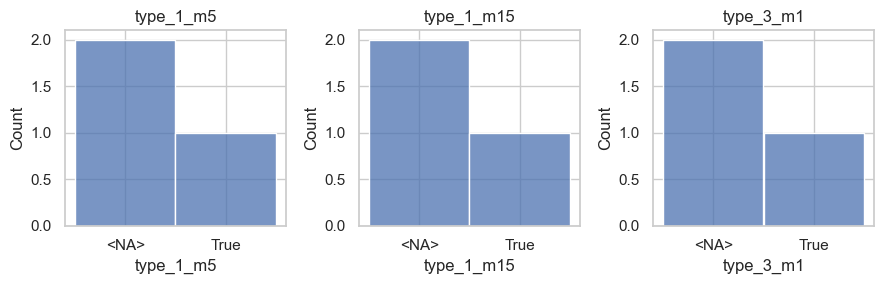

In [296]:
plot_feature_distributions(df, type_X_cols,)

In [297]:
df

,trade_uid,entry_time,outcome,account,poi_1h_sc,poi_1h_liquidity_grab,poi_1h_mitigation,poi_15m_sc,poi_15m_liquidity_grab,poi_15m_mitigation,poi_1m_sc,poi_1m_liquidity_grab,poi_1m_mitigation,poi,tp_price,potential_return,type_1_m5,SL_distance,entry_price,type_1_m15,return_points,session,management_strategy,initial_return,side,close_price,type_3_m1,numerical_confidence,rr,TP_distance,potential_price,sl_price,potential_risk_reward,taken,htf_poi_ltf_confirmation,initial_risk_reward,htf_poi_ltf_confirmation_True,session_new_york,management_strategy_be_after_push,management_strategy_no_management,side_long,side_short,outcome_win
0,2,2025-02-18 14:10:00,NaN,mt5_vantage,False,False,False,False,False,False,False,False,False,"(NO_POI,)",3000.00,NaN,<NA>,3.09,2914.03,<NA>,NaN,new_york,no_management,85.97,long,NaN,<NA>,NaN,NaN,85.97,NaN,2910.94,NaN,True,<NA>,27.822006,False,True,False,True,True,False,False
1,4,2025-02-22 15:11:00,win,ideal,True,True,False,False,False,False,True,False,False,"(poi_1h_sc, poi_1m_sc, poi_1h_liquidity_grab)",22105.27,-564.4,True,-14.69,22164.40,True,-59.13,new_york,be_after_push,-59.13,short,22105.27,True,5.0,4.025187,-59.13,21600.0,22179.09,38.420694,<NA>,True,4.025187,True,True,True,False,False,True,True
2,5,NaT,NaN,None,False,False,False,False,False,False,False,False,False,"(NO_POI,)",NaN,NaN,<NA>,NaN,NaN,<NA>,NaN,NaN,no_management,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,False,False,False,True,False,False,False


In [298]:
import analysis
import features
import trade

#logging.getLogger().setLevel(logging.DEBUG)
logging.getLogger().setLevel(logging.WARNING)

def summarize_trade(trade: jr.Trade, df: pd.DataFrame):    
    df = df[df['trade_uid'] == trade.uid]
    if len(df) == 0:
        logging.warning(f"Trade {trade.uid} not found in df")
    display(df)
    display(trade)
    
    pp(trade.get_tags_dict())
    
    features = used_feature_classes(df)
    
    print(f"Features: {features}")
    pp(features)
    
    
summarize_trade(jr.j.trades[0], df)


,trade_uid,entry_time,outcome,account,poi_1h_sc,poi_1h_liquidity_grab,poi_1h_mitigation,poi_15m_sc,poi_15m_liquidity_grab,poi_15m_mitigation,poi_1m_sc,poi_1m_liquidity_grab,poi_1m_mitigation,poi,tp_price,potential_return,type_1_m5,SL_distance,entry_price,type_1_m15,return_points,session,management_strategy,initial_return,side,close_price,type_3_m1,numerical_confidence,rr,TP_distance,potential_price,sl_price,potential_risk_reward,taken,htf_poi_ltf_confirmation,initial_risk_reward,htf_poi_ltf_confirmation_True,session_new_york,management_strategy_be_after_push,management_strategy_no_management,side_long,side_short,outcome_win
0,2,2025-02-18 14:10:00,NaN,mt5_vantage,False,False,False,False,False,False,False,False,False,"(NO_POI,)",3000.0,NaN,<NA>,3.09,2914.03,<NA>,NaN,new_york,no_management,85.97,long,NaN,<NA>,NaN,NaN,85.97,NaN,2910.94,NaN,True,<NA>,27.822006,False,True,False,True,True,False,False


Trade(uid='2', tags=[Tag(timestamp=None, key='taken', value=True), Tag(timestamp=None, key='account', value='mt5_vantage'), Tag(timestamp=None, key='entry_time', value=Timestamp('2025-02-18 14:10:00')), Tag(timestamp=None, key='entry_price', value=2914.03), Tag(timestamp=None, key='sl_price', value=2910.94), Tag(timestamp=None, key='tp_price', value=3000.0), Tag(timestamp=None, key='SL_distance', value=3.0900000000001455), Tag(timestamp=None, key='TP_distance', value=85.9699999999998), Tag(timestamp=None, key='side', value='long'), Tag(timestamp=None, key='session', value='new_york'), Tag(timestamp=None, key='initial_risk_reward', value=27.822006472490536), Tag(timestamp=None, key='initial_return', value=85.9699999999998), Tag(timestamp=None, key='management_strategy', value='no_management'), Tag(timestamp=None, key='poi', value=('NO_POI',)), Tag(timestamp=None, key='poi_1h_sc', value=False), Tag(timestamp=None, key='poi_1h_liquidity_grab', value=False), Tag(timestamp=None, key='poi_1h

{'taken': True,
 'account': 'mt5_vantage',
 'entry_time': Timestamp('2025-02-18 14:10:00'),
 'entry_price': 2914.03,
 'sl_price': 2910.94,
 'tp_price': 3000.0,
 'SL_distance': 3.0900000000001455,
 'TP_distance': 85.9699999999998,
 'side': 'long',
 'session': 'new_york',
 'initial_risk_reward': 27.822006472490536,
 'initial_return': 85.9699999999998,
 'management_strategy': 'no_management',
 'poi': ('NO_POI',),
 'poi_1h_sc': False,
 'poi_1h_liquidity_grab': False,
 'poi_1h_mitigation': False,
 'poi_15m_sc': False,
 'poi_15m_liquidity_grab': False,
 'poi_15m_mitigation': False,
 'poi_1m_sc': False,
 'poi_1m_liquidity_grab': False,
 'poi_1m_mitigation': False}
Features: ['MultiTimeframeAnalysis', 'PotentialReward', 'Outcome', 'Confidence', 'RiskManagement', 'EntryTime', 'Sessions', 'InitialReward', 'TradePosition', 'RR']
['MultiTimeframeAnalysis',
 'PotentialReward',
 'Outcome',
 'Confidence',
 'RiskManagement',
 'EntryTime',
 'Sessions',
 'InitialReward',
 'TradePosition',
 'RR']


,trade_uid,potential_profit,final_size,initial_entry_price,final_exit_time,point_value,sl_price,total_profit,n_modifications,initial_entry_time,tp_price,n_partial_closes,has_partials_closed,initial_size,potential_loss,side,duration_sec,avg_entry_price
0,01,False,False,85490.33,2025-04-15 14:39:00,0.878665,85379.48,47.562129,3,2025-04-15 13:11:29,90068.42,False,False,0.5,False,long,5251.0,85523.87


,side,initial_entry_time,final_exit_time,duration_sec,initial_entry_price,avg_entry_price,current_size,total_profit,point_value,sl_price,tp_price,n_modifications,potential_profit,potential_loss,has_partials_closed,n_partial_closes,first_partial_close_time,last_partial_close_time,modifications
0,long,2025-04-15 13:11:29,2025-04-15 14:39:00,5251.0,85490.33,85523.87,0.0,47.562129,0.878665,85379.48,90068.42,3,0.0,0.0,False,0,None,None,"{'action': 'initial_trade', 'time': 2025-04-15..."
1,long,2025-04-15 13:11:29,2025-04-15 14:39:00,5251.0,85490.33,85523.87,0.0,47.562129,0.878665,85379.48,90068.42,3,0.0,0.0,False,0,None,None,"{'action': 'add_position', 'time': 2025-04-15 ..."
2,long,2025-04-15 13:11:29,2025-04-15 14:39:00,5251.0,85490.33,85523.87,0.0,47.562129,0.878665,85379.48,90068.42,3,0.0,0.0,False,0,None,None,"{'action': 'close_trade', 'time': 2025-04-15 1..."


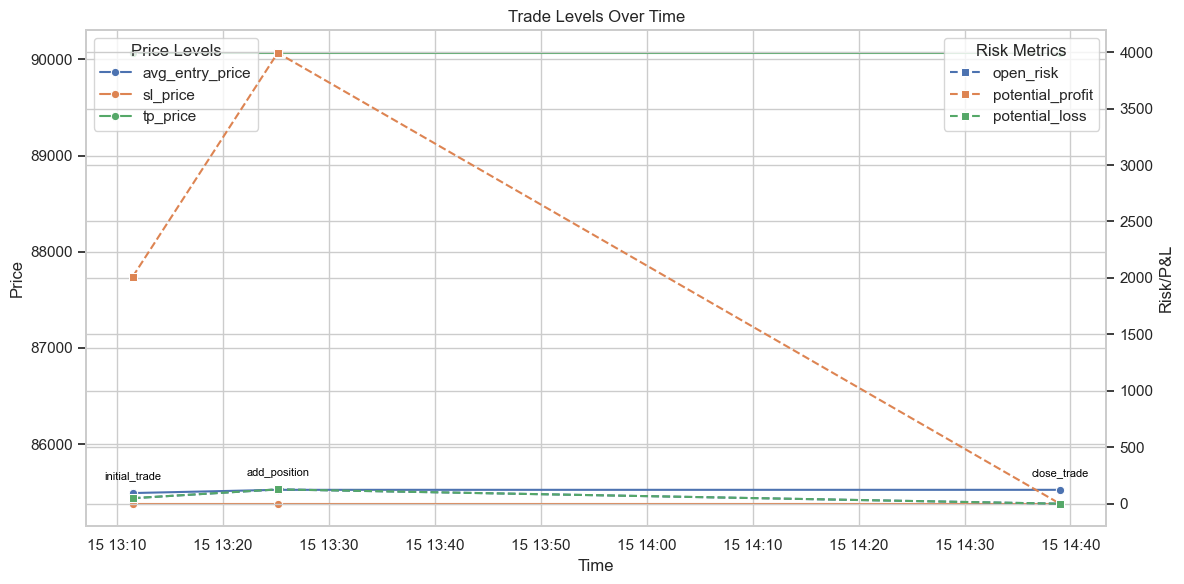

In [ ]:

df = pd.DataFrame(t.get_trade_summary())
display(df)
d = t.to_trade_row()
pd.DataFrame([d])
t.plot_trade_levels()
